# Hands On #5

**Chapter 10 – Introduction to Artificial Neural Networks with Keras**

Due date: 2023-03-06

File name convention: For group 42 and members Richard Stallman and Linus <br> Torvalds it would be: <br>
"05_neural_nets_with_keras_Stallman_Torvalds.pdf"

Submission via blackboard (UA).

Feel free to answer free text questions in text cells using markdown and <br>
possibly $\LaTeX{}$ if you want to.

**You don't have to understand every line of code here and it is not intended <br> 
for you to try to understand every line of code.<br>
Big blocks of code are usually meant to just be clicked through.**

# Setup

In [2]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
assert tf.__version__ >= "2.0"

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# Perceptrons

**Perceptrons are a form of linear classifier**. The characteristic expression is <br> 
$\Sigma_i w_i \cdot x_i + b$. Where x are your inputs and w are your model
weights<br> 
and b is a learnable bias term. The classification part comes in by setting <br>
**any positive result of the above expression as the 1 or True label** and any <br> **negative result as the 0 or False label**. We then use stochastic gradient <br>
descent to optimize the weights and bias.

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(int)

### Task 1:
Fit the iris dataset into a Perceptron layer and predict the class of a sample <br>
with petal length of 2 and a petal width of 0.5. 

Use: 
`max_iter=1000`, `tol =1e-3` and `random_state= 42`.





**Note**: we set `max_iter` and `tol` explicitly to avoid warnings about the <br>
fact that their default value will change in future versions of Scikit-Learn.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [4]:
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)
X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)

In [5]:
y_pred

array([1, 0])

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

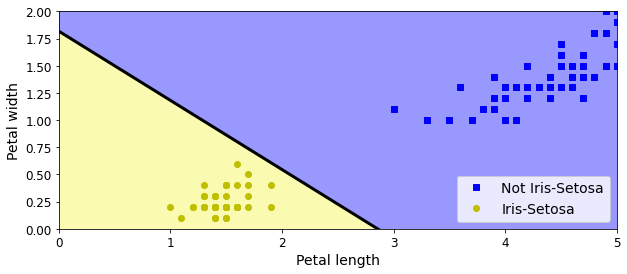

In [6]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

### Task 2
 Elaborate on the difference between a perceptron and logistic regression.

 **Hint:** Consider the nature of the boundary in the above plot.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your answer goes below

Task 2 answer:

Perceptron is a type of linear classifier that is designed to learn a linear decision boundary that divides the two classes in the input space. It works by generating a binary output that corresponds to the predicted class label that is generated from taking a weighted sum of the input features and passing it over an activation function. Using the perceptron learning rule the weights of the perceptron are updated iteratively, which modifies the weights based on the misclassified samples until a satisfactory performance is attained. Perceptron is a simple and computationally efficient algorithm that can handle huge datasets. However, it may not perform well when there are overlapping regions between the classes, or the classes are not linearly separable.

Logistic regression is a probabilistic model that estimates the probability of the target output being one of the two classes given the input features. Logistic regression uses a logistic function to convert the linear combination of the input features and weights into a probability value that ranges from 0 to 1. The logistic regression model is trained using maximum likelihood estimation, which aims to maximize the likelihood of detecting the training data given the model parameters. This involves minimizing the cross-entropy loss function, which measures the difference between the predicted probabilities and the true class labels. Logistic regression is a flexible and robust algorithm that can model complex nonlinear relationships between the input features and the target output. However, if the number of features is too large compared to the number of training examples, logistic regression is could be prone to overfitting.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your answer goes above

# Activation functions

### Task 3
Describe the role of activation functions within a neural network. If you build <br>
a neural network with no activation function, which model that we've seen in <br>
this class would your network resemble?

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your answer goes below

Task 3 answer:

Activation functions are an important aspect in neural networks since they introduce nonlinearity to the output of each neuron. The introduction of nonlinearity to the neural network, allows it to study complex and nonlinear relationships between the input features and the target output. Activation functions convert the output of each neuron into a nonlinear form that can acquire the complex patterns in the data, permitting the network to learn more complex decision boundaries and higher-order interactions between the features. If we build a neural network with no activation function, it will look like a linear regression model. Thus, in this case the output of the neural network would be a linear combination of the input features and weights, with no nonlinearity introduced in the model.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your answer goes above

# Building an Image Classifier

First let's import TensorFlow and Keras. **Tensorflow is a machine learning** <br>
**platform** developed by Google Brain. **Keras is a python interface for Tensorflow**. <br>
That mean that **we'll typically use model and functions from Keras** but those are <br>
built using building blocks and data structures from Tensorflow.

In [7]:
import tensorflow as tf
from tensorflow import keras

In [8]:
tf.__version__

'2.11.0'

In [9]:
keras.__version__

'2.11.0'

Let's start by loading the [fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. Keras has a number <br>
of functions to load popular datasets in `keras.datasets`. **The dataset is** <br> **already split for you between a training set and a test set**, but it can be <br> useful to split the training set further to have a validation set:

In [10]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [11]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [12]:
X_train_full.dtype

dtype('uint8')

Let's **split the full training set into a validation set and a (smaller)** <br> **training set**. We also **scale the pixel intensities down to the 0-1 range** and <br> 
convert them to floats, by dividing by 255. This is essentially min-max scaling <br>
or normalization for pixels with a maximum value of 255 and a minimum of 0.

In [13]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'` <br>
color map:

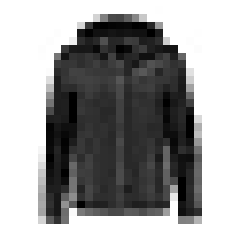

In [14]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [15]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [16]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [17]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [18]:
X_valid.shape

(5000, 28, 28)

In [19]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

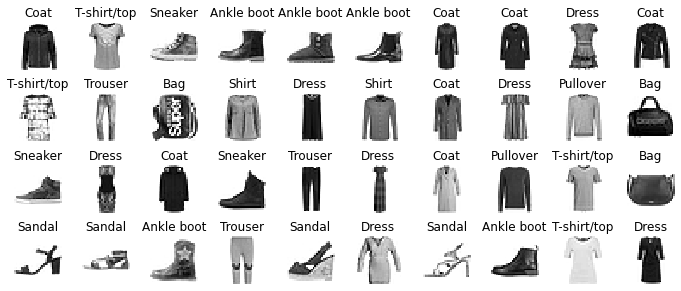

In [20]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**Training a neural network using Keras:** In the cells below we  build an deep <br> 
neural network model using Keras Sequential tool. The input is an image of <br> shape 28 by 28. We use a network with 2 hidden layers with 300 and 100 neurons, <br> 
respectively. The 'softmax' output activation function is used for multi-label <br> 
classification. **This is essentially a multi-layer perceptron model with** <br>
**activation functions added** to each "neuron". Additionally, **we no longer end** <br>
**the model with a decision function** that outputs either a 0 or 1. Here our final <br>
layer's **weights will be passed through a softmax function which will output a** <br>
**collection of 10 values which add up to 1**. These are the probabilities of each <br>
class being the correct class.

In [21]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [22]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


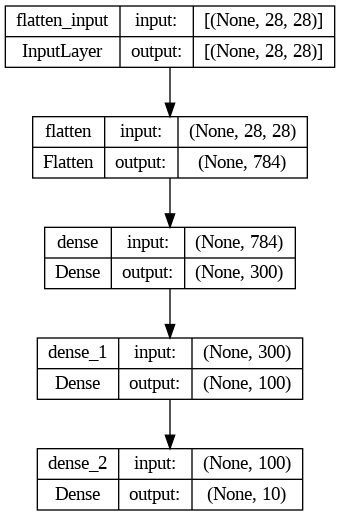

In [24]:
keras.utils.plot_model(model, show_shapes=True)

We can look at the layers directly:

In [25]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [26]:
model.get_layer(hidden1.name) is hidden1

True

In [27]:
weights, biases = hidden1.get_weights()

In [28]:
weights

array([[ 0.01541207, -0.03785767, -0.02427477, ...,  0.05318563,
        -0.07067347, -0.05203392],
       [ 0.06097847,  0.04165442,  0.04927099, ..., -0.00393409,
         0.00366166,  0.06594771],
       [-0.03166212, -0.06979883, -0.04235583, ...,  0.00985254,
        -0.00677682,  0.02441644],
       ...,
       [-0.0460761 ,  0.02180802,  0.06390744, ...,  0.00011306,
        -0.06486173, -0.03325956],
       [-0.02925905,  0.07377711,  0.02239324, ...,  0.04495545,
         0.02710214,  0.01464543],
       [-0.00105347,  0.03943481, -0.00253703, ...,  0.01188911,
        -0.05287416,  0.00221432]], dtype=float32)

In [29]:
weights.shape

(784, 300)

In [30]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [31]:
biases.shape

(300,)

**Compilation:**  
**Keras allows us to "compile" a complete model which uses the model parameter** <br> 
**structure we defined above**. We compile the model using the  <br>
**"sparse_categorical_crossentropy" loss function** and **"accuracy" as metric** for a <br> 
multi-label classification task. In addition, we choose the **"sgd" optimizer**.<br>
The **SGD optimizer is a derivative of the SGD algorithm** but, instead of updating <br>
coefficients for a linear regression as we saw in previous exercises, we <br> **compute the gradient of our loss function** (sparse categorical crossentropy) <br>
**with respect to our model weights and layer biases** and use that to **update our** <br>
**weights and biases**. Note that our gradient will now be the sum of more <br> complicated partial derivatives. $\partial L/\partial w_i = (\partial L / \partial f(w_i)) (\partial f(w_i) / \partial w_i)$ <br>
where $f(w_i) = ReLU(w_i + b)$.

In [32]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Now let's train the model for 30 epochs.

We save the most crucial parameters (`['loss', 'accuracy', 'val_loss',` <br> '`val_accuracy']`) in a dictionary named "history". 

In [33]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 4ms/step - loss: 0.7239 - accuracy: 0.7617 - val_loss: 0.5143 - val_accuracy: 0.8270
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4857 - accuracy: 0.8292 - val_loss: 0.4362 - val_accuracy: 0.8504
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4399 - accuracy: 0.8449 - val_loss: 0.5202 - val_accuracy: 0.8058
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4134 - accuracy: 0.8552 - val_loss: 0.3950 - val_accuracy: 0.8676
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3948 - accuracy: 0.8612 - val_loss: 0.3761 - val_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3761 - accuracy: 0.8683 - val_loss: 0.3716 - val_accuracy: 0.8738
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3640 - accuracy: 0.8703 - val_loss: 0.3621 - val_accuracy

In [34]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

Epochs is the number of full passes of your data. Step is the number of <br>
times your model will update per epoch. Verbosity is the amount of information <br>
that will be included. Verbosity of 0 has minimal information. Verbosity of 1 <br>
has the most information. Verbosity of 2 is in between.

In [35]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Let's visualize the learning curves for this model training.

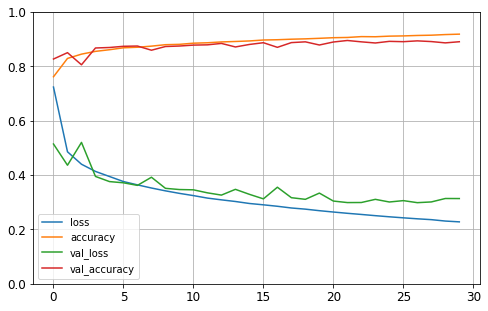

In [37]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Task 4
 Validate your model using `model.evaluate` on the test set made of `X_test` <br> and `y_test`. 

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [38]:
# evaluate model on  test set
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3469 - accuracy: 0.8785


[0.34688037633895874, 0.8784999847412109]

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

### Task 5
 Select the first three samples from the test set and predict their <br> corresponding classes using model.predict_classes . Then print the names/ <br>
 categories of the elements in  question (Eg. "Pants", "trouser") 

Hint: With `model.predict(...)` you can get the predictions in a [one-hot-encoded](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/) <br> 
format. Use `np.argmax(prediction, axis=-1)` on the one-hot-encoded predicitons <br>
to get the classes numbers.

In [39]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 160ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.04, 0.  , 0.95],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [40]:
# y_pred = 
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [41]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

In [42]:
y_test[0:3]

array([9, 2, 1], dtype=uint8)

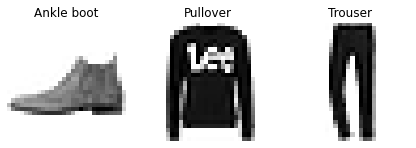

In [43]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Regression MLP

We can also build multi-layer perceptrons for regression. The difference here <br>
is that we remove the step function that says 

Let's load, split and scale the [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html).

In [44]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)


### Task 6
 Scale your training, validation, and test feature matrices using scikit-learn's <br>
[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Best practice is to fit your scaler to a single sample and <br>
scale all samples by the same amount. This standard scaler is implementing <br>
standardization also sometimes referred to as standard normalization.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [45]:
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

In [46]:
np.random.seed(42)
tf.random.set_seed(42)

### Task 7
 Build a Neural Network with one hidden layer with 30 neurons. The output layer <br> 
has one neuron, which is the regression value. Compile, fit then train this <br> 
network on the data created in task 6 while choosing the suitable loss function <br> 
and the SGD optimizer. 

**N.B:**  This task is similar to task 5 except that we now do regression not <br> classification. 

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [47]:
#model = #
model = keras.models.Sequential([
        keras.layers.Dense(30, activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
    ])

#...
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))


Epoch 1/20
363/363 [==============================] - 3s 5ms/step - loss: 2.5837 - val_loss: 1.2747
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.8309 - val_loss: 0.7194
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6894 - val_loss: 0.7406
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6389 - val_loss: 0.6111
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6018 - val_loss: 0.5788
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5709 - val_loss: 0.5498
Epoch 7/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5456 - val_loss: 0.5556
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5247 - val_loss: 0.5095
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5071 - val_loss: 0.4965
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4930 - val_loss: 0.4820

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

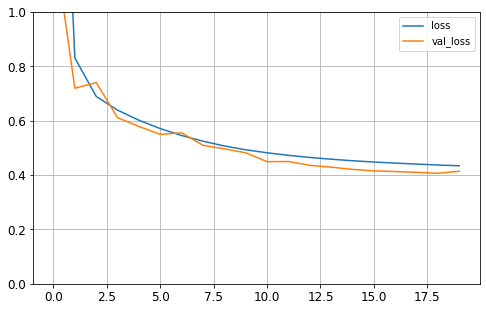

In [48]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Task 8
Validate your model using `model.evaluate` on the test set. <br>
Also predict one element of the test set of your choice (`X_test[42]` for <br> example) and compare to the real value.

Note that to have consistent dimensionality, you'll have to pass `X_test[42:43]` <br>
rather than `X_test[42]` into your model prediction. Passing only `X_test[42]` <br> in will result in an error.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [49]:
mse_test = model.evaluate(X_test,y_test)
X_new = X_test[:3]
y_pred= model.predict(X_new)
y_pred,y_test[:3]

1/1 [==============================] - 0s 50ms/step


(array([[0.7003417],
        [1.6125379],
        [3.529078 ]], dtype=float32), array([0.477  , 0.458  , 5.00001]))

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

# Saving the model weights for future use

In [50]:
model.save("my_keras_model")

In [51]:
model_reloaded = keras.models.load_model("my_keras_model")

In [52]:
model_reloaded.predict(X_test[42:43])

1/1 [==============================] - 0s 54ms/step


array([[0.9495529]], dtype=float32)

In [53]:
model.save_weights("my_keras_weights.h5")

In [54]:
model.load_weights("my_keras_weights.h5")

## Looking at the saved weights

In [55]:
import h5py

In [56]:
f = h5py.File("my_keras_weights.h5")

In [57]:
list(f.keys())

['dense_3', 'dense_4', 'top_level_model_weights']

In [58]:
for name in f["dense_3/dense_3"]:
    print(name)

bias:0
kernel:0


In [59]:
f["dense_3"]["dense_3"].keys()

<KeysViewHDF5 ['bias:0', 'kernel:0']>

In [60]:
np.array(f["dense_3"]["dense_3"]["bias:0"])

array([ 0.40355867,  0.40144247, -0.02482332, -0.03411128, -0.11425748,
        0.00201345,  0.20933104,  0.02152185,  0.3620102 ,  0.07782628,
        0.09071014,  0.03154486, -0.01835655,  0.16476443,  0.06613661,
        0.09634557,  0.11552209,  0.00122359, -0.01791471, -0.10375617,
       -0.01169757,  0.10141266, -0.04847819,  0.03346445,  0.00562317,
       -0.08608665, -0.01260673, -0.15535706,  0.04937037,  0.06813648],
      dtype=float32)

In [61]:
np.array(f["dense_3"]["dense_3"]["kernel:0"])

array([[ 0.34528005,  0.32763883,  0.11970465,  0.19751884, -0.2705702 ,
        -0.07974805,  0.14890313,  0.11277808,  0.34856096, -0.00073827,
         0.46500972,  0.15233354,  0.30680245,  0.33678427, -0.02427021,
        -0.16236587, -0.17252995, -0.43169573, -0.22054036,  0.20340239,
        -0.04270963, -0.13856769, -0.00841143,  0.22785318,  0.04072577,
         0.14756852, -0.08448671,  0.1905379 , -0.27686995,  0.16943796],
       [-0.15207528,  0.37029555,  0.1377491 , -0.22398634,  0.19396943,
        -0.38061404, -0.26402795, -0.24712983, -0.04768825,  0.3032758 ,
         0.05065006, -0.1645667 , -0.13877538, -0.21824828,  0.16656403,
        -0.33545777,  0.3419968 ,  0.36284277,  0.16855401, -0.2077993 ,
        -0.2606992 ,  0.25903618,  0.29778728, -0.18479474,  0.00463573,
         0.10848344,  0.06730932, -0.1214812 , -0.25568977,  0.16799508],
       [-0.42051852, -0.10388707,  0.25014338, -0.21693434,  0.12290816,
        -0.12628172,  0.45021844,  0.17658596, -0

In [62]:
f["dense_3"]["dense_3"]["kernel:0"].shape

(8, 30)

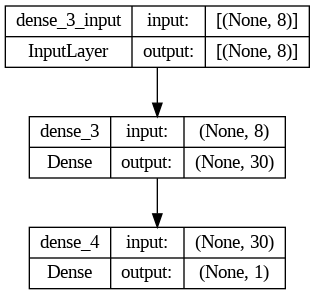

In [63]:
keras.utils.plot_model(model, show_shapes=True)

One layer is actually nothing but performing a matrix multiplication, adding <br> 
the bias and putting it through the activation function. <br>
You can see this by looking at the shape of `dense_3`.

### Task 9
 For `X_train[0]` perform the forward pass yourself using matrix <br> multiplications.
Remember to include the biases. <br>
Check with the prediction of the model that you get exactly the same! <br>

Hints:
- use `np.dot(x,y)` for matrix multiplication
- for the first layer it would look like this:
    * matrix mult: `X_new` dot `l1`
    * add bias `b1`
    * apply `relu(...)`

In [64]:
b1 = np.array(f["dense_3"]["dense_3"]["bias:0"])
l1 = np.array(f["dense_3"]["dense_3"]["kernel:0"])
b2 = np.array(f["dense_4"]["dense_4"]["bias:0"])
l2 = np.array(f["dense_4"]["dense_4"]["kernel:0"])

In [65]:
X_new = X_train[0]

In [66]:
X_new.shape

(8,)

In [67]:
l1.shape

(8, 30)

In [68]:
b1.shape

(30,)

In [69]:
def relu(z):
    return np.maximum(0, z)

In [70]:
model.predict(X_train[0:1])   # reproduce this!

1/1 [==============================] - 0s 28ms/step


array([[2.7536707]], dtype=float32)

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [71]:
g1 = np.dot(X_new, l1) + b1
g1_act = relu(g1)
g2 = np.dot(g1_act, l2) + b2
g2_act = np.max(g2)
print("Model prediction:", end="")
print("{0:.7f}".format(g2_act))

Model prediction:2.7536708


↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

# Optional task

**Exercise (bonus task, +3 points):**   
Train a deep MLP on the MNIST dataset (you can load it using <br>
`keras.datasets.mnist.load_data()`. See if you can get over 98% precision.

You can try searching for the optimal learning rate by using the approach <br>
presented in this chapter (i.e., by growing the learning rate exponentially, <br> 
plotting the loss, and finding the point where the loss shoots up). Try adding <br> 
all the bells and whistles—save checkpoints, use early stopping, and plot <br> learning curves using TensorBoard. <br>
Feel free to use other methods.

Let's load the dataset:

In [72]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Just like for the Fashion MNIST dataset, the MNIST training set contains 60,000 <br> 
grayscale images, each 28x28 pixels:

In [73]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is also represented as a byte (0 to 255):

In [74]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) <br>
training set. We also scale the pixel intensities down to the 0-1 range and <br> 
convert them to floats, by dividing by 255, just like we did for Fashion MNIST:

In [75]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [76]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [77]:
from sklearn.preprocessing import OneHotEncoder
ohc_encoder = OneHotEncoder()
ohc_encoder.fit(y_train.reshape(-1,1))
y_train_ohc = ohc_encoder.transform(y_train.reshape(-1,1)).toarray()
y_valid_ohc = ohc_encoder.transform(y_valid.reshape(-1,1)).toarray()
y_test_ohc = ohc_encoder.transform(y_test.reshape(-1,1)).toarray()

In [78]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [79]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(256, activation='relu'),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss="categorical_crossentropy", metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [80]:
def exponential_decay(gh0, s):
    def exponential_decay_fn(epoch):
        return gh0 * 0.1**(epoch / s)
    return exponential_decay_fn

In [81]:
tensorboard_cb = keras.callbacks.TensorBoard(log_dir="logs")

history = model.fit(X_train, y_train_ohc, epochs=50,
                    validation_data=(X_valid, y_valid_ohc),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb,
                               keras.callbacks.LearningRateScheduler(exponential_decay(gh0=0.01, s=20))])

Epoch 1/50
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6225 - accuracy: 0.8411 - val_loss: 0.3028 - val_accuracy: 0.9204 - lr: 0.0100
Epoch 2/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2885 - accuracy: 0.9182 - val_loss: 0.2408 - val_accuracy: 0.9326 - lr: 0.0089
Epoch 3/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2400 - accuracy: 0.9312 - val_loss: 0.2050 - val_accuracy: 0.9432 - lr: 0.0079
Epoch 4/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2107 - accuracy: 0.9398 - val_loss: 0.1878 - val_accuracy: 0.9482 - lr: 0.0071
Epoch 5/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1905 - accuracy: 0.9456 - val_loss: 0.1716 - val_accuracy: 0.9518 - lr: 0.0063
Epoch 6/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1754 - accuracy: 0.9501 - val_loss: 0.1622 - val_accuracy: 0.9550 - lr: 0.0056
Epoch 7/50
1719/1719 [==============================] - 7s

313/313 [==============================] - 1s 3ms/step - loss: 0.1167 - accuracy: 0.9653
Test accuracy: 0.9653000235557556


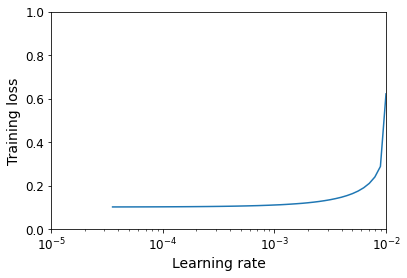

In [82]:
model = keras.models.load_model('my_mnist_model.h5')
test_loss, test_acc = model.evaluate(X_test, y_test_ohc)
print('Test accuracy:', test_acc)

plt.semilogx(history.history['lr'], history.history['loss'])
plt.axis([1e-5, 1e-2, 0, 1])
plt.xlabel('Learning rate')
plt.ylabel('Training loss')
plt.show()

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above